In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

# read .img file
parameters_fp = Path("/Users/rt582/Downloads/parameters/parameters.img.hdr")
mix_fracs_fp = Path("/Users/rt582/Downloads/mixing_fractions/mixing_fractions.img.hdr")
hl_1_fp = Path("/Users/rt582/Downloads/sim_Rrs_wind_02_sunzen_20/sim_Rrs_wind_02_sunzen_20.img.hdr")

# open envi image files with spectral
from spectral import open_image, envi
parameters = open_image((parameters_fp))
mix_fracs = open_image((mix_fracs_fp))
hl_1 = open_image((hl_1_fp))

wvs = list(map(float, hl_1_meta["wavelength"]))
SENSOR_RANGE = (450, 690)

In [49]:
param_vals = parameters.load()
mix_fracs_vals = mix_fracs.load()
print("param_vals.shape", param_vals.shape)
print("mix_fracs_vals.shape", mix_fracs_vals.shape)
print("––––––")
print("hl_1.shape", hl_1.shape)

param_vals.shape (2000, 4, 1)
mix_fracs_vals.shape (6, 3003, 1)
––––––
hl_1.shape (2000, 3003, 230)


In [51]:
# for a given combination of the first three values of param_vals (0), select the corresponding fourth value

param_vals_0 = param_vals[:,:,0]
param_vals_1 = param_vals[:,:,1]
param_vals_2 = param_vals[:,:,2]
param_vals_2.shape

(2000, 4, 0)

Text(0, 0.5, 'reflectance')

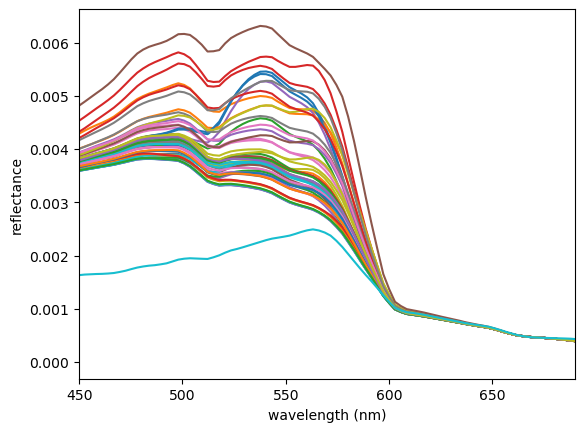

In [78]:
# plot all the spectra (230 wavelengths) corresponding to the first 50 values of the first of 3003
values = np.array(hl_1[1600:1650, 3003, :])
for s in range(values.shape[0]):
    plt.plot(wvs, values[s, 0, : ].T)

plt.xlim(SENSOR_RANGE)
plt.xlabel("wavelength (nm)")
plt.ylabel("reflectance")

In [35]:
mix_fracs_meta = envi.read_envi_header(mix_fracs_fp)
mix_fracs_meta

{'description': 'line 1 = algae, line 2 = coral, line 3 = mud, line 4 = octocoral, line 5 = sand, line 6 = seagrass',
 'samples': '3003',
 'lines': '6',
 'bands': '1',
 'header offset': '0',
 'file type': 'ENVI Standard',
 'data type': '4',
 'interleave': 'bsq',
 'sensor type': 'Unknown',
 'byte order': '0'}

In [67]:
# read envi description
hl_1_meta = envi.read_envi_header(hl_1_fp)
wvs


[396.01,
 398.84,
 401.67,
 404.5,
 407.33,
 410.17,
 413.0,
 415.83,
 418.66,
 421.49,
 424.32,
 427.15,
 429.99,
 432.82,
 435.65,
 438.48,
 441.31,
 444.15,
 446.98,
 449.81,
 452.64,
 455.48,
 458.31,
 461.14,
 463.97,
 466.8,
 469.64,
 472.47,
 475.3,
 478.14,
 480.97,
 483.8,
 486.63,
 489.47,
 492.3,
 495.13,
 497.97,
 500.8,
 503.63,
 506.47,
 509.3,
 512.13,
 514.97,
 517.8,
 520.63,
 523.47,
 526.3,
 529.13,
 531.97,
 534.8,
 537.64,
 540.47,
 543.3,
 546.14,
 548.97,
 551.81,
 554.64,
 557.47,
 560.31,
 563.14,
 565.98,
 568.81,
 571.65,
 574.48,
 577.32,
 580.15,
 582.99,
 585.82,
 588.66,
 591.49,
 594.33,
 597.16,
 600.0,
 602.83,
 605.67,
 608.5,
 611.34,
 614.17,
 617.01,
 619.84,
 622.68,
 625.51,
 628.35,
 631.19,
 634.02,
 636.86,
 639.69,
 642.53,
 645.37,
 648.2,
 651.04,
 653.87,
 656.71,
 659.55,
 662.38,
 665.22,
 668.06,
 670.89,
 673.73,
 676.57,
 679.4,
 682.24,
 685.08,
 687.91,
 690.75,
 693.59,
 696.42,
 699.26,
 702.1,
 704.94,
 707.77,
 710.61,
 713.45,


In [30]:
# Rows: different combinations of depth and AOPs
# Samples: different Rb mixtures
# 230 bands
hl_1_meta

{'description': 'Simluated PRISM Rrs image [08-Aug-2018 14:29:37]',
 'samples': '3003',
 'lines': '2000',
 'bands': '230',
 'header offset': '0',
 'file type': 'ENVI Standard',
 'data type': '4',
 'interleave': 'bip',
 'sensor type': 'Unknown',
 'byte order': '0',
 'wavelength units': 'Nanometers',
 'wavelength': ['396.01',
  '398.84',
  '401.67',
  '404.50',
  '407.33',
  '410.17',
  '413.00',
  '415.83',
  '418.66',
  '421.49',
  '424.32',
  '427.15',
  '429.99',
  '432.82',
  '435.65',
  '438.48',
  '441.31',
  '444.15',
  '446.98',
  '449.81',
  '452.64',
  '455.48',
  '458.31',
  '461.14',
  '463.97',
  '466.80',
  '469.64',
  '472.47',
  '475.30',
  '478.14',
  '480.97',
  '483.80',
  '486.63',
  '489.47',
  '492.30',
  '495.13',
  '497.97',
  '500.80',
  '503.63',
  '506.47',
  '509.30',
  '512.13',
  '514.97',
  '517.80',
  '520.63',
  '523.47',
  '526.30',
  '529.13',
  '531.97',
  '534.80',
  '537.64',
  '540.47',
  '543.30',
  '546.14',
  '548.97',
  '551.81',
  '554.64',
  

In [31]:
# display first spectrum
subset = hl_1.load()[0]

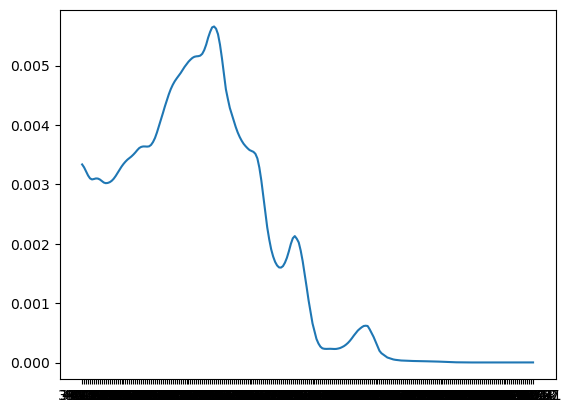

In [32]:
# cast envi image array to numpy array
subset = np.array(subset)
plt.plot(wvs, subset[0,0,:])